In [26]:
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy.signal import convolve

Local Polynomial Approximation
-------------------------------
Set the parameters

In [27]:
# maximum degree of polynomial used for fitting
N = 2

# filter size
M = 51

# large M, small N -> a lot of bias when frequency increases
# N = 2
# M = 51

# large M, large N -> smaller bias than before, but a lot of variance in smooth regions
# N = 7
# M = 51

# small M, small N -> smaller bias everywhere, higher variance
# N = 2
# M = 5

# M small, M = N,  -> smaller bias than before, higher variance than before
# N = 5
# N = M

Generate synthetic signal signal

In [28]:
LENGHT = 1000

ty = np.linspace(0, 1, LENGHT)
y = np.sin(2 / (ty + 0.05))

#  noise standard deviation
sigma = 0.1

# noisy signal
s = y + sigma*np.random.normal(size=LENGHT)


Text(0.5, 1.0, 'Input Signal')

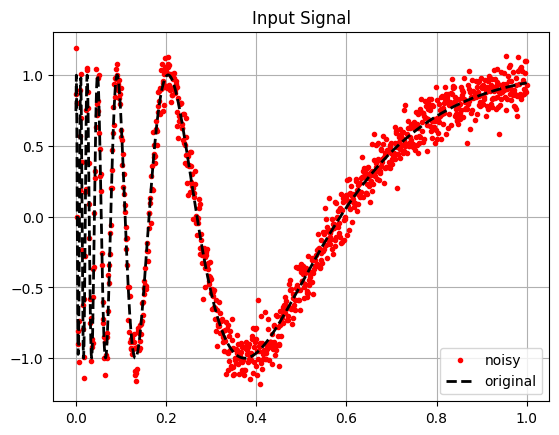

In [29]:
plt.figure()
plt.plot(ty, s, 'r.')
plt.plot(ty, y, 'k--', linewidth=2)
plt.grid()
plt.legend(['noisy', 'original'])
plt.title('Input Signal')

Define the matrix T containing the polynomials sampled over the window


In [30]:
t = np.linspace(0, 1, M) 
# regression matrix with 1 t1 t1^2 ... t1^N; 1 t2 t2^2 ... t2^N; ... 1 tM tM^2 ... tM^N
T = np.array([t**i for i in range(N+1)]).T


Look at the matrix T, the columns correspond to polynomials sampled over the interval [0,1]


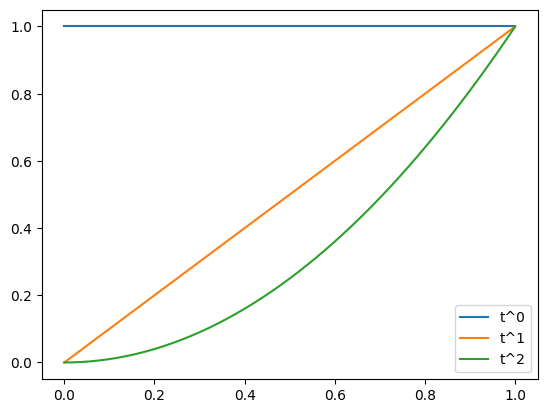

In [31]:
plt.figure()
leg = []
for l in range(N+1):
    plt.plot(t, T[:, l])
    leg.append(f't^{l:d}')
plt.legend(leg)

Construct the LPA kernel

In [32]:
# comput the qr decomposition of WT
# since T has more rows than columns, then qr computes only the first N + 1 columns of Q and the first N + 1 rows of R.
Q, R = np.linalg.qr(T) 

# select the central row of W2Qtilde
row = Q[Q.shape[0] // 2, :]

# compute the kernel
g = row @ Q.T

# flipping, since it is used in convolution
g =  np.flip(g)

In [33]:
# plt.figure()
# plt.plot(g, 'rs', linewidth=3)
# plt.title(f'M = {M:d}, N = {N:d}')


Filtering

In [34]:
# convolution of g with the signal
shat = convolve(s,g, 'same')

Text(0.5, 1.0, 'M = 51, N = 2')

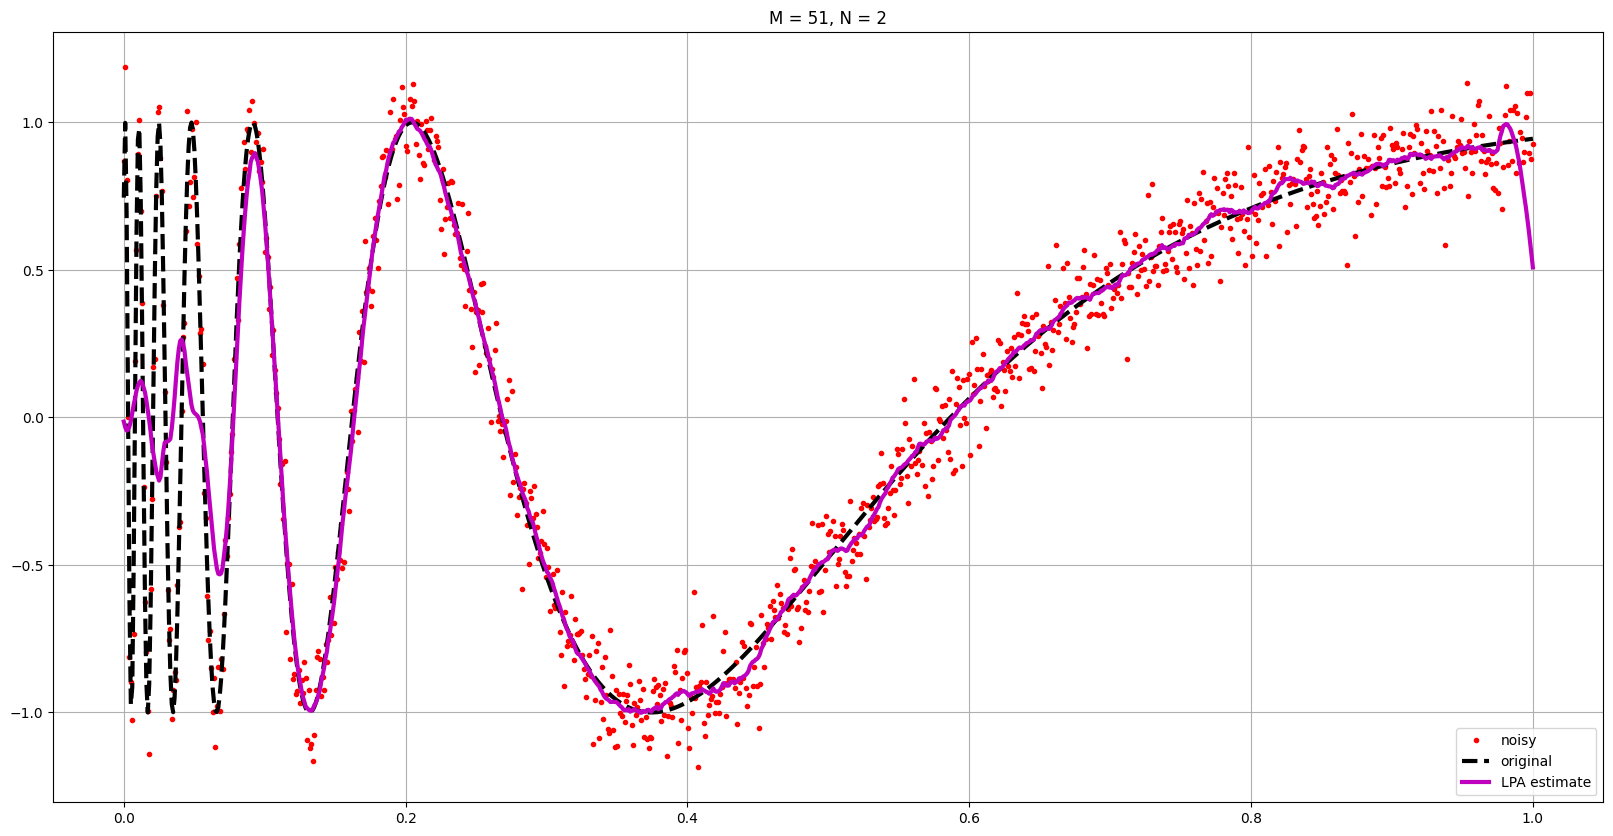

In [35]:
plt.figure(figsize=(20,10))
plt.plot(ty, s, 'r.')
plt.plot(ty, y, 'k--', linewidth=3)
plt.plot(ty, shat, 'm-', linewidth=3)
plt.grid()
plt.legend(['noisy', 'original', 'LPA estimate'])
plt.title(f'M = {M:d}, N = {N:d}')


Weighted LPA
--------------
Set the parameters

In [36]:
# maximum degree of polynomial used for fitting
N = 2

# filter size
M = 53

# half filter size
HFS = int((M-1)/2)

# set the weights. Here weights simply define the window size
w = np.zeros(M)

# centered kernel
wc = w.copy()
wc[int(HFS/2):-int(HFS/2)] = 1

# left kernel
wl = w.copy()
wl[:HFS+1] = 1

# right kernel
wr = w.copy()
wr[-HFS-1:] = 1


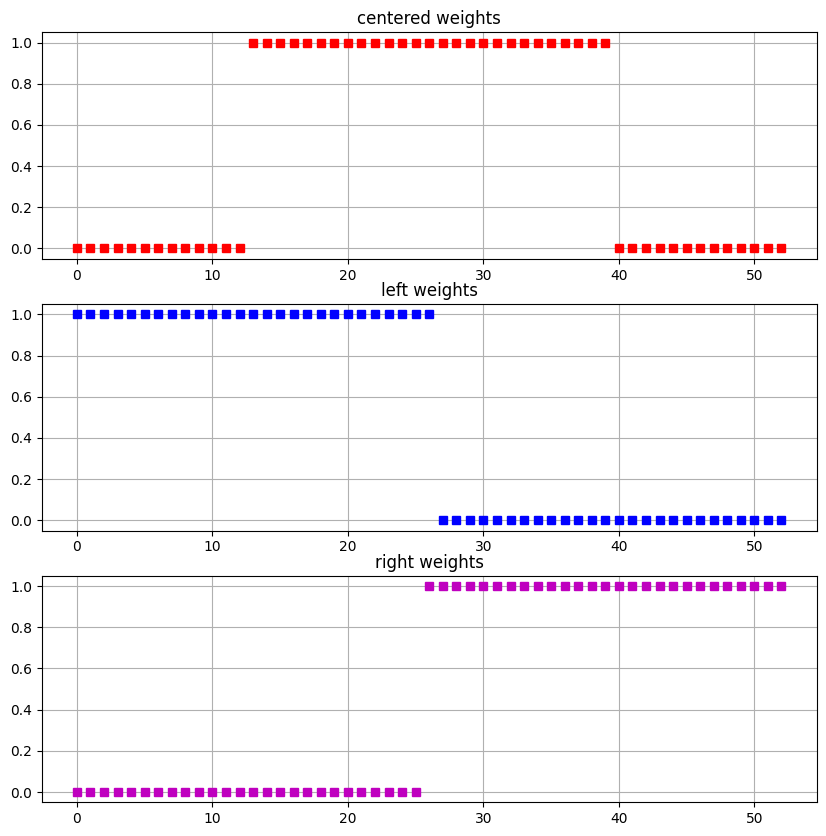

In [37]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
ax[0].plot(wc, 'rs', linewidth=3)
ax[0].set_title('centered weights')
ax[0].grid()
ax[1].plot(wl, 'bs', linewidth=3)
ax[1].set_title('left weights')
ax[1].grid()
ax[2].plot(wr, 'ms', linewidth=3)
ax[2].set_title('right weights')
ax[2].grid()


Build the weight matrix

In [38]:
# select a single weight to be used in what follows
w = wc
# generate the inverse of weights
winv = np.linalg.pinv(np.diag(w)) 
# set to zero weights that are inf
# winv...

# define the weight matrix
W = np.diag(w) 
Winv = np.linalg.pinv(np.diag(w))

Generate synthetic signal signal

In [39]:
LENGHT = 1000

# clean signal
ty = np.linspace(0, 1, LENGHT)
y =  8*ty**2 - 2*ty + 2;
y[LENGHT//2 : LENGHT] = y[LENGHT//2 : LENGHT] + 7;

#  noise standard deviation
sigma = 0.2

# noisy signal
s = y + sigma*np.random.normal(size=LENGHT)

Text(0.5, 1.0, 'Input Signal')

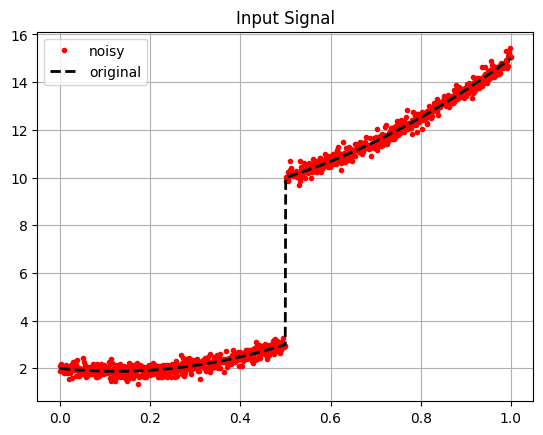

In [40]:

plt.figure()
plt.plot(ty, s, 'r.')
plt.plot(ty, y, 'k--', linewidth=2)
plt.grid()
plt.legend(['noisy', 'original'])
plt.title('Input Signal')

Define the matrix T containing the polynomials sampled over the window

In [41]:
t = np.linspace(0, 1, M) 
T = np.array([t**i for i in range(N+1)]).T


Construct the LPA kernel

In [42]:
# comput the qr decomposition of WT
# since T has more rows than columns, then qr computes only the first N + 1 columns of Q and the first N + 1 rows of R.
Q, R = np.linalg.qr(W@T) 

#  define Qtilde
Qtilde = Winv@Q 

# adjust Qtilde with the  weights matrix squared.
W2Qtilde = W@W@Qtilde

# select the central row of W2Qtilde
row = Qtilde.shape[0] // 2 

# compute the kernel
g = 0
for i in range(N+1):
    g += np.dot(Qtilde[row,i], W2Qtilde[:,i]) 

# flipping, since it is used in convolution
g = np.flip(g) 


Text(0.5, 1.0, 'filter M = 53, N = 2')

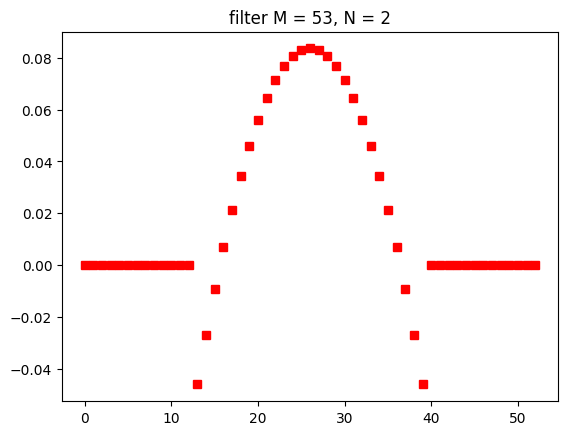

In [43]:
plt.figure()
plt.plot(g, 'rs', linewidth=3)
plt.title(f'filter M = {M:d}, N = {N:d}')


Filtering


In [44]:
shat = convolve(s,g, 'same') 


Text(0.5, 1.0, 'M = 53, N = 2')

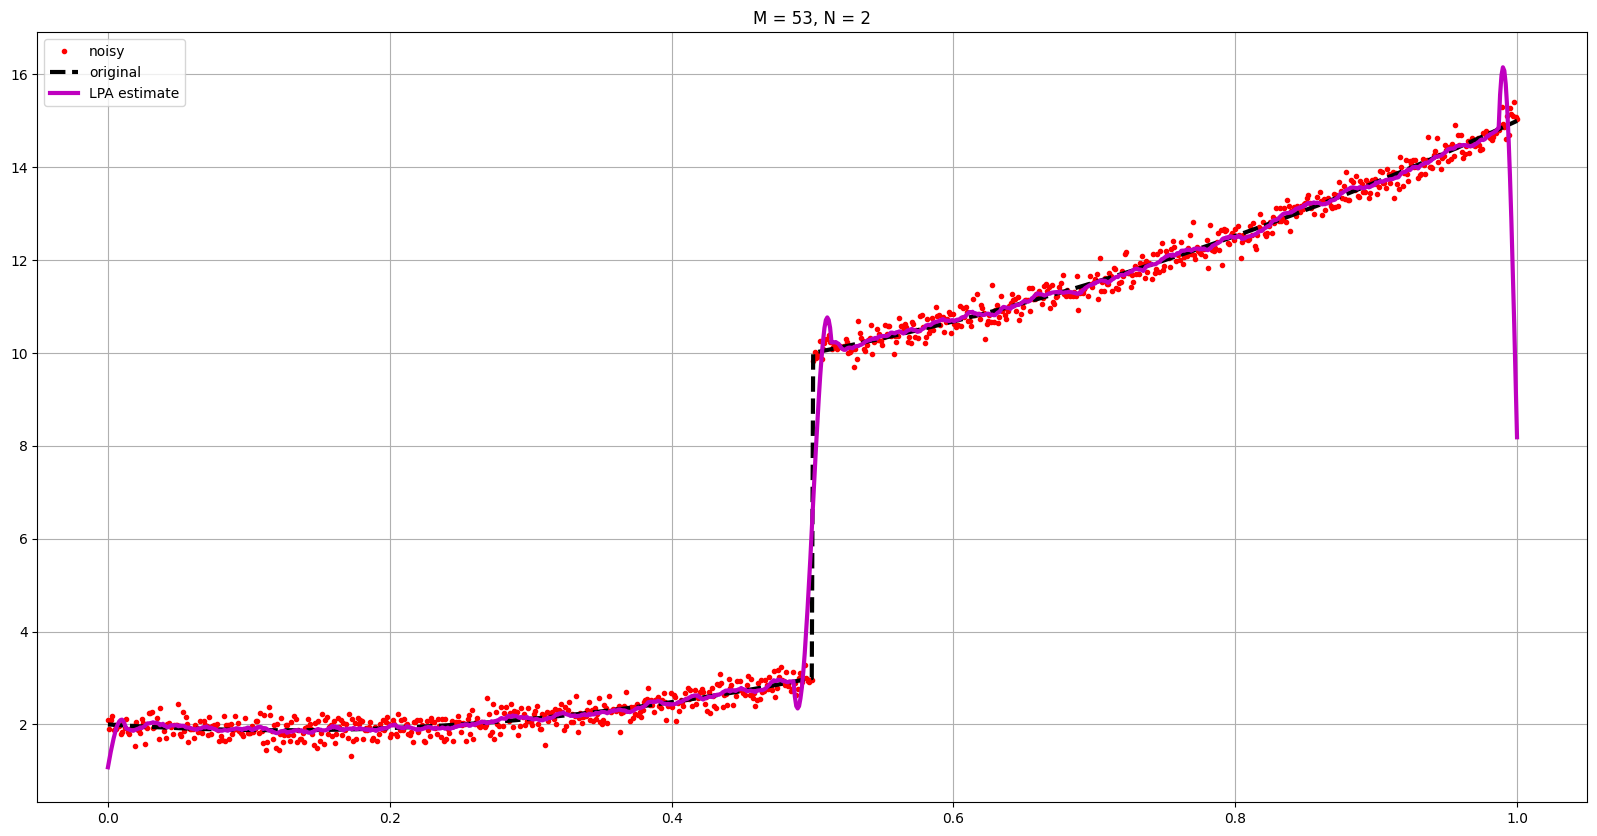

In [45]:
plt.figure(figsize=(20,10))
plt.plot(ty, s, 'r.')
plt.plot(ty, y, 'k--', linewidth=3)
plt.plot(ty, shat, 'm-', linewidth=3)
plt.grid()
plt.legend(['noisy', 'original', 'LPA estimate'])
plt.title(f'M = {M:d}, N = {N:d}')



Modify the code to use the central, left and right kernels

In [46]:
#list of Weight matrices
W_list = [np.diag(wl), np.diag(wc), np.diag(wr)]
Winv_list = [np.linalg.pinv(W_list[0]), np.linalg.pinv(W_list[1]), np.linalg.pinv(W_list[2])]



In [47]:
g_list = []
for i, W_i in enumerate(W_list):
    Q, R = np.linalg.qr(W_i@T) 

    #  define Qtilde
    Qtilde = Winv_list[i]@Q 

    # adjust Qtilde with the  weights matrix squared.
    W2Qtilde = W_list[i]@W_list[i]@Qtilde

    # select the central row of W2Qtilde
    row = Qtilde.shape[0] // 2 

    # compute the kernel
    g = 0
    for i in range(N+1):
        g += Qtilde[row,i] * W2Qtilde[:,i]

    # flipping, since it is used in convolution
    g_list.append(np.flip(g)) 
    i += 1

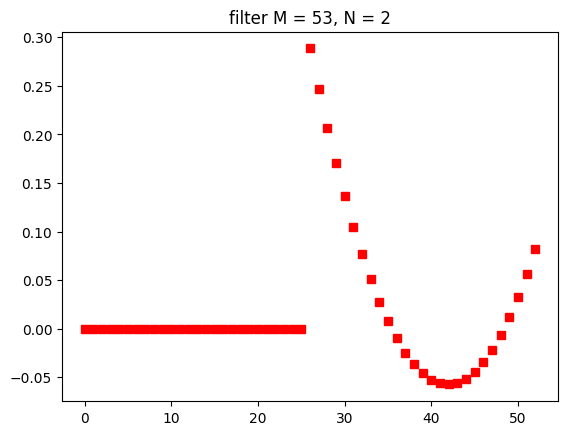

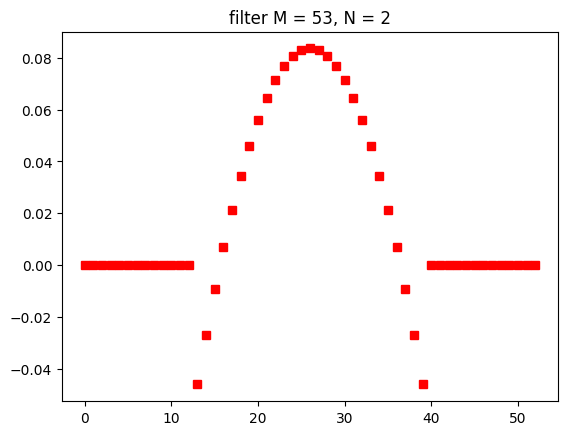

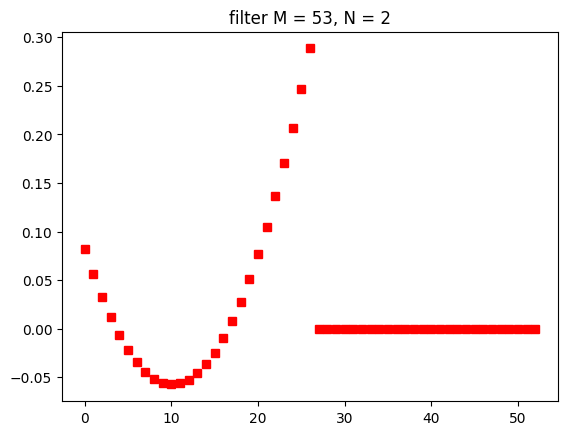

In [48]:

for g_i in g_list:
    plt.figure()
    plt.plot(g_i, 'rs', linewidth=3)
    plt.title(f'filter M = {M:d}, N = {N:d}')


In [49]:
shat_list = []
for g_i in g_list:
    shat_list.append(convolve(s,g_i, 'same'))
  

Text(0.5, 1.0, 'M = 53, N = 2')

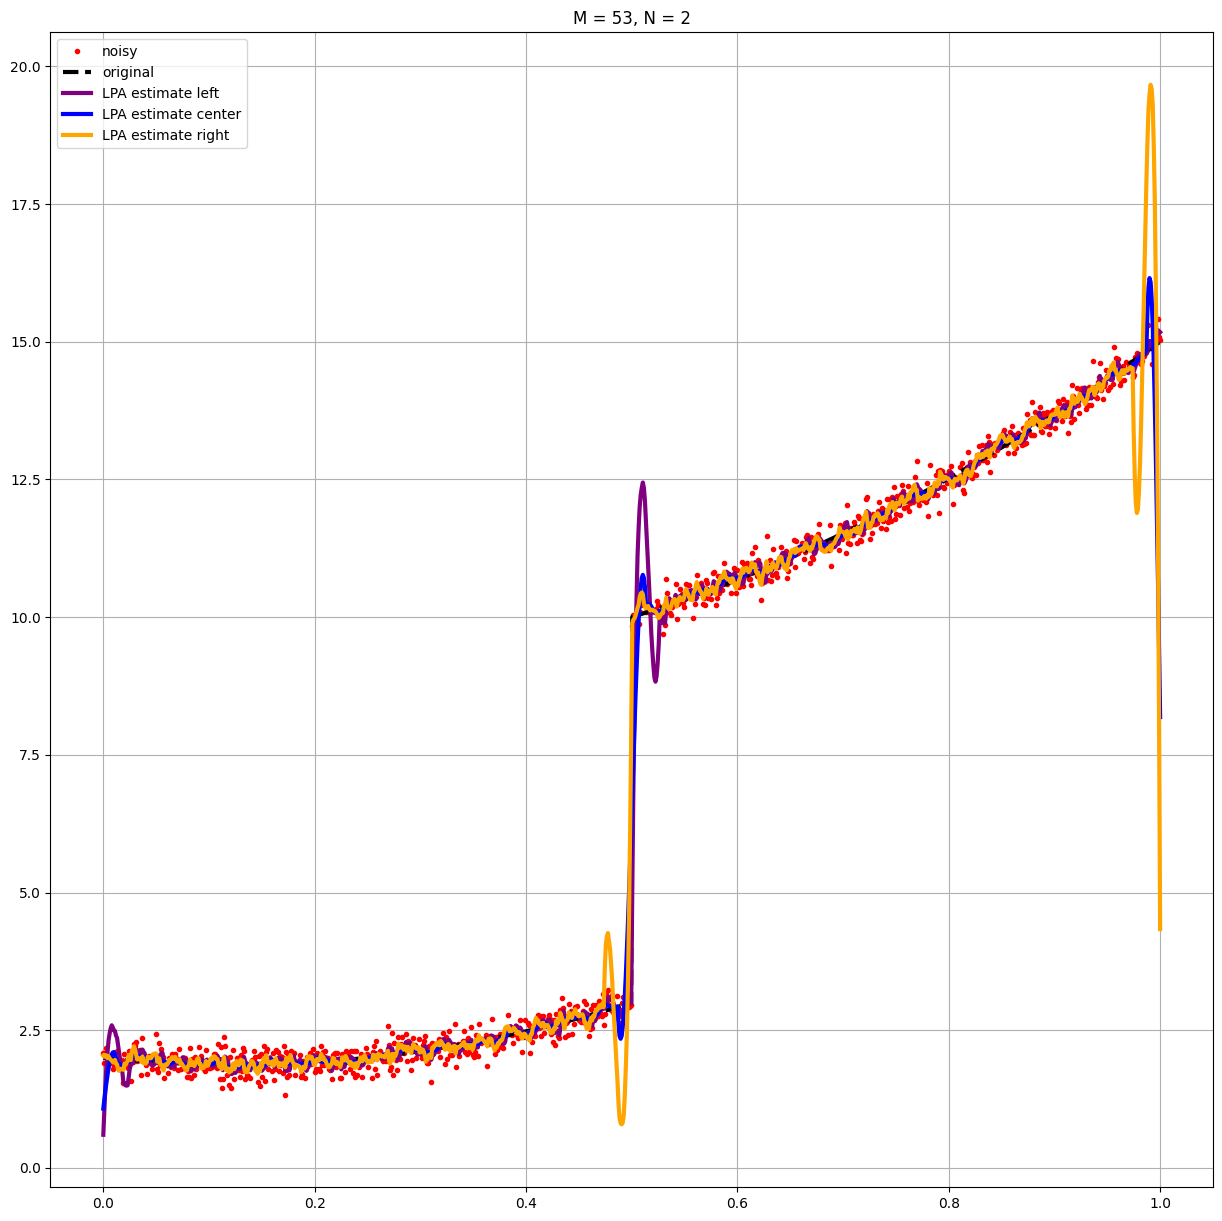

In [50]:
colors = ['purple', 'blue', 'orange']
plt.figure(figsize=(15,15))
plt.plot(ty, s, 'r.')
plt.plot(ty, y, 'k--', linewidth=3)
for shat, color in zip(shat_list, colors):
    plt.plot(ty, shat, color=color, linewidth=3)
plt.grid()
plt.legend(['noisy', 'original', 'LPA estimate left', 'LPA estimate center', 'LPA estimate right'])
plt.title(f'M = {M:d}, N = {N:d}')
